# Homework 6

## Exercise 6

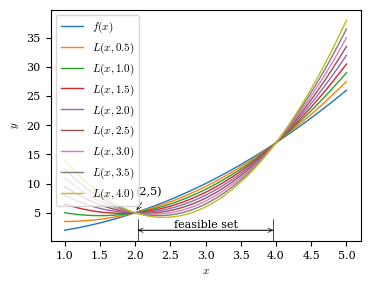

In [93]:
import numpy
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['font.size'] = 8
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['lines.linewidth'] = 1


def L(x, lam):
    return x**2 + 1 + lam * (x - 2) * (x - 4)


X = numpy.linspace(1, 5, 100)

plt.plot(X, L(X, 0), label=r'$f(x)$')
for lam in numpy.arange(0.5, 4.5, 0.5):
    plt.plot(X, L(X, lam), label=f'$L(x,{lam})$')

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend()


# annotate the feasible set 2 < x < 4
def annotation_line(xmin, xmax, y, text):
    plt.annotate('',
                 xy=(xmin, y),
                 xytext=(xmax, y),
                 arrowprops={
                     'arrowstyle': '|-|',
                     'linewidth': 0.5,
                 })
    plt.annotate('',
                 xy=(xmin, y),
                 xytext=(xmax, y),
                 arrowprops={
                     'arrowstyle': '<->',
                     'linewidth': 0.5,
                 })
    plt.annotate(text, xy=((xmin + xmax) / 2, y + 1), ha='center', va='center')


annotation_line(2, 4, 2, 'feasible set')

# annotate the optimal solution x = 2 and the optimal value f(x) = 5
plt.annotate('(2,5)',
             xy=(2, 5),
             xytext=(2, 8),
             arrowprops={
                 'arrowstyle': '->',
                 'linewidth': 0.5
             })

plt.gcf().set_size_inches(4, 3)
plt.savefig('lagrangian.pdf')


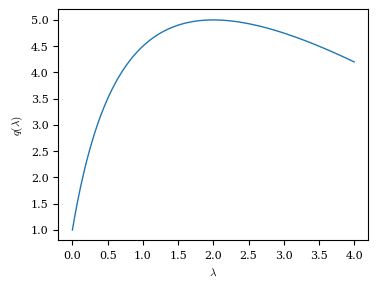

In [112]:
def q(lam):
    return (-lam**2 + 9 * lam + 1) / (lam + 1)


# q = numpy.vectorize(q, otypes=[float])

Lam = numpy.linspace(0, 4, 100)
plt.plot(Lam, q(Lam))
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$q(\lambda)$')

plt.gcf().set_size_inches(4, 3)
plt.savefig('dual.pdf')

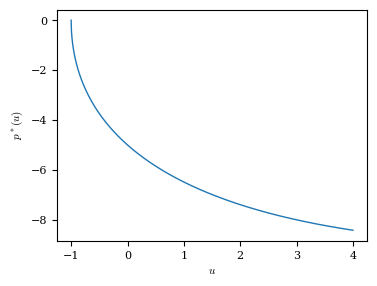

In [108]:
from numpy import sqrt


def p(u):
    return u + 1 - 6 * sqrt(u + 1)


u = numpy.linspace(-1, 4, 1000)
plt.plot(u, p(u))
plt.xlabel(r'$u$')
plt.ylabel(r'$p^*(u)$')

plt.gcf().set_size_inches(4, 3)
plt.savefig('sensitivity.pdf')

## Exercise 3

In [12]:
import numpy
from scipy.optimize import minimize

# define the objective function
A = numpy.array([[4, -4, -2, 2], [-4, 4, 2, -2], [-2, 2, 1, -1],
                 [2, -2, -1, 1]])


def f(x):
    return x.T @ A @ x / 2 - numpy.sum(x)


# define the constraints
cons = ({
    'type': 'eq',
    'fun': lambda x: -x[0] - x[1] + x[2] + x[3],
})

# solve the problem
res = minimize(f, [0, 0, 0, 0], constraints=cons, bounds=[(0, 233)] * 4)

print(res)


     fun: -931.9999999998214
     jac: array([-1., -1., -1., -1.])
 message: 'Optimization terminated successfully'
    nfev: 30
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([233., 233., 233., 233.])
